In [3]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB 640.0 kB/s eta 0:00:03
     --- ------------------------------------ 0.1/1.4 MB 1.3 MB/s eta 0:00:02
     --------- ------------------------------ 0.3/1.4 MB 3.0 MB/s eta 0:00:01
     ----------------- ---------------------- 0.6/1.4 MB 3.9 MB/s eta 0:00:01
     ------------------------ --------------- 0.9/1.4 MB 4.5 MB/s eta 0:00:01
     ------------------------------ --------- 1.1/1.4 MB 4.5 MB/s eta 0:00:01
     ------------------------------------- -- 1.3/1.4 MB 4.6 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
     ---------------------------------------- 0.0/269.9 kB ? et

  DEPRECATION: labelme is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
albucore                     0.0.21
albumentations               1.4.23
annotated-types              0.7.0
asttokens                    3.0.0
astunparse                   1.6.3
beautifulsoup4               4.12.3
cachetools                   5.5.0
certifi                      2024.12.14
charset-normalizer           3.4.0
colorama                     0.4.6
coloredlogs                  15.0.1
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.11
decorator                    5.1.1
eval_type_backport           0.2.2
exceptiongroup               1.2.2
executing                    2.1.0
filelock                     3.16.1
flatbuffers                  24.3.25
fonttools                    4.55.3
gast                         0.4.0
gdown                        5.2.0
google-auth                  2.3


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import os
import time
import uuid
import cv2

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [10]:
cap = cv2.VideoCapture(0)  # Adjust the index if you have multiple cameras
if not cap.isOpened():
    print("Error: Unable to access the camera.")

In [12]:
ret, frame = cap.read()
if not ret:
    print("Error: Failed to capture frame.")

In [23]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
!labelme

In [ ]:
#Review d ataset and build image loading Function

In [7]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle=False)

In [9]:
images.as_numpy_iterator().next()

b'data\\images\\25edae08-c074-11ef-bb69-e8bfb8b4a36a.jpg'

In [11]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [13]:
images = images.map(load_image)

In [15]:
images.as_numpy_iterator().next()

array([[[146, 133, 114],
        [143, 130, 111],
        [141, 128, 109],
        ...,
        [144, 134, 107],
        [144, 134, 107],
        [144, 134, 107]],

       [[147, 134, 115],
        [144, 131, 112],
        [143, 130, 111],
        ...,
        [145, 135, 108],
        [144, 134, 107],
        [144, 134, 107]],

       [[144, 131, 112],
        [142, 129, 110],
        [142, 129, 110],
        ...,
        [145, 135, 108],
        [145, 135, 108],
        [145, 135, 108]],

       ...,

       [[179, 201, 199],
        [179, 201, 199],
        [178, 200, 198],
        ...,
        [ 25,  24,  20],
        [ 25,  24,  20],
        [ 24,  23,  19]],

       [[179, 199, 200],
        [179, 199, 200],
        [178, 198, 199],
        ...,
        [ 26,  25,  21],
        [ 25,  24,  20],
        [ 25,  24,  20]],

       [[179, 199, 200],
        [179, 199, 200],
        [178, 198, 199],
        ...,
        [ 26,  25,  21],
        [ 26,  25,  21],
        [ 26,  25,  21]]

In [17]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [19]:
image_generator = images.batch(4).as_numpy_iterator()

In [31]:
plot_images = image_generator.next()

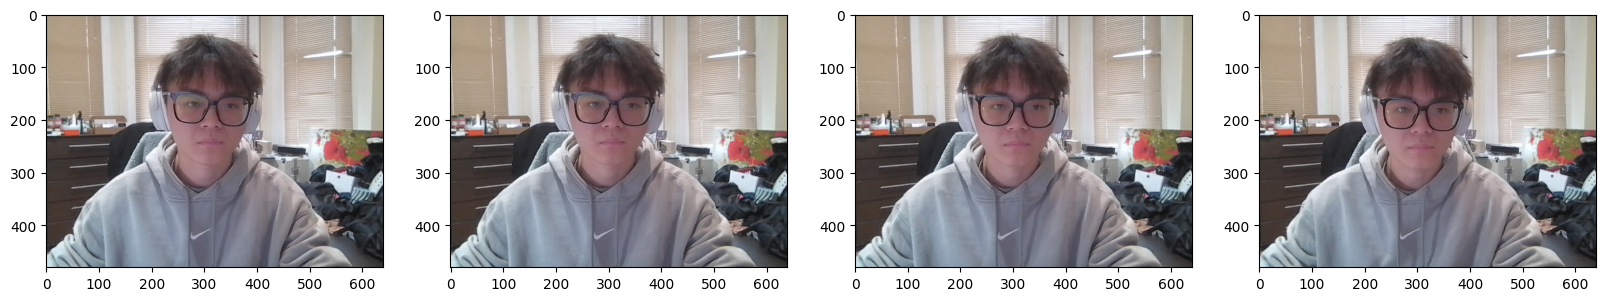

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [ ]:
#Partition Unaugmented Data

In [35]:
#1.Manually split data into train test and val

In [ ]:
#2. Move the Matching Labels

In [ ]:
90*.7 # 63 to train

In [ ]:
90*.15 # 14 and 13 to test and val

In [67]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

In [69]:
#Apply Image Augmentation on Images and Labels using Albumentations

In [468]:
import albumentations as alb

In [470]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [472]:
#Load a Test Image and Annotation with OpenCV and JSON

In [476]:
img = cv2.imread(os.path.join('data','train', 'images','25edae08-c074-11ef-bb69-e8bfb8b4a36a.jpg'))

In [478]:
img

array([[[116, 133, 146],
        [113, 130, 143],
        [109, 128, 143],
        ...,
        [109, 134, 144],
        [107, 134, 144],
        [108, 135, 145]],

       [[118, 135, 148],
        [115, 132, 145],
        [111, 130, 145],
        ...,
        [111, 136, 146],
        [108, 135, 145],
        [108, 135, 145]],

       [[114, 131, 144],
        [113, 130, 143],
        [110, 129, 144],
        ...,
        [111, 136, 146],
        [109, 136, 146],
        [108, 135, 145]],

       ...,

       [[202, 201, 181],
        [201, 200, 180],
        [200, 199, 179],
        ...,
        [ 22,  24,  25],
        [ 22,  24,  25],
        [ 22,  24,  25]],

       [[203, 199, 180],
        [202, 198, 179],
        [202, 198, 179],
        ...,
        [ 23,  25,  26],
        [ 23,  25,  26],
        [ 23,  25,  26]],

       [[202, 198, 179],
        [202, 198, 179],
        [201, 197, 178],
        ...,
        [ 23,  25,  26],
        [ 23,  25,  26],
        [ 23,  25,  26]]

In [480]:
with open(os.path.join('data', 'train', 'labels', '25edae08-c074-11ef-bb69-e8bfb8b4a36a.json'), 'r') as f:
    label = json.load(f)

In [482]:
label['shapes'][0]['points']

[[211.21951219512195, 58.292682926829244],
 [371.219512195122, 284.6341463414634]]

In [484]:
#Extract Coordinates and Rescale to Match Image Resolution

In [486]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [488]:
coords

[211.21951219512195, 58.292682926829244, 371.219512195122, 284.6341463414634]

In [490]:
coords = list(np.divide(coords, [640,480,640,480]))

In [492]:
coords

[0.33003048780487804,
 0.12144308943089425,
 0.5800304878048781,
 0.5929878048780488]

In [500]:
#Apply Augmentations and View Results

In [502]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [504]:
augmented['image']

array([[[ 80, 106, 128],
        [ 81, 107, 129],
        [ 81, 107, 129],
        ...,
        [136, 148, 163],
        [136, 148, 163],
        [131, 143, 158]],

       [[ 85, 111, 132],
        [ 86, 112, 133],
        [ 86, 112, 133],
        ...,
        [111, 123, 138],
        [103, 115, 130],
        [ 97, 109, 124]],

       [[ 86, 112, 133],
        [ 86, 112, 133],
        [ 87, 113, 135],
        ...,
        [ 89, 101, 116],
        [ 89, 101, 116],
        [ 93, 105, 120]],

       ...,

       [[135, 129, 119],
        [142, 137, 127],
        [148, 142, 132],
        ...,
        [130, 123, 126],
        [118, 111, 114],
        [107, 100, 103]],

       [[141, 136, 126],
        [132, 127, 117],
        [135, 129, 119],
        ...,
        [110, 102, 105],
        [106,  99, 102],
        [103,  96,  99]],

       [[139, 133, 124],
        [128, 123, 113],
        [137, 131, 122],
        ...,
        [103,  96,  99],
        [100,  92,  96],
        [ 97,  89,  92]]

In [506]:
augmented['bboxes'][0][:2] #xmin and ymin

[0.3915989345974392, 0.09398374345567491]

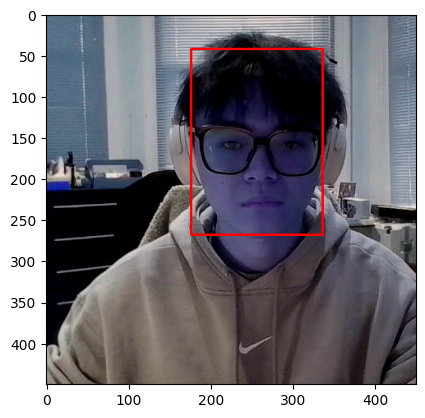

In [508]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [223]:
#Build and Run Augmentation Pipeline

In [510]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
           
        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

Expected x_min for bbox [211.21951294  58.29268265 371.21951294 284.63415527   0.        ] to be in the range [0.0, 1.0], got 211.21951293945312.
Expected x_min for bbox [214.63414001  61.70731735 370.73171997 288.53659058   0.        ] to be in the range [0.0, 1.0], got 214.63414001464844.
Expected x_min for bbox [213.17073059  49.02439117 376.0975647  284.63415527   0.        ] to be in the range [0.0, 1.0], got 213.1707305908203.
Expected x_min for bbox [211.70732117  58.29268265 367.80487061 285.12194824   0.        ] to be in the range [0.0, 1.0], got 211.7073211669922.
Expected x_min for bbox [212.19512939  45.12195206 373.17074585 287.07318115   0.        ] to be in the range [0.0, 1.0], got 212.19512939453125.
Expected x_min for bbox [216.58537292  53.4146347  386.82925415 282.68292236   0.        ] to be in the range [0.0, 1.0], got 216.5853729248047.
Expected x_min for bbox [220.          54.39024353 384.87805176 290.           0.        ] to be in the range [0.0, 1.0], got 2

IndexError: list index out of range

In [512]:
#Load Augmented Images to Tensorflow Dataset

In [514]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [516]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [518]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [520]:
train_images.as_numpy_iterator().next()

array([[[0.07610294, 0.07610294, 0.07610294],
        [0.07432598, 0.07432598, 0.07432598],
        [0.04068628, 0.04068628, 0.04068628],
        ...,
        [0.49509802, 0.5421569 , 0.5892157 ],
        [0.5041054 , 0.55373776, 0.5995098 ],
        [0.5146446 , 0.56280637, 0.6093137 ]],

       [[0.09117647, 0.09117647, 0.09117647],
        [0.11323529, 0.11323529, 0.11323529],
        [0.08523285, 0.08523285, 0.08523285],
        ...,
        [0.47941175, 0.5264706 , 0.5735294 ],
        [0.49748775, 0.55153185, 0.595098  ],
        [0.5158701 , 0.57169116, 0.61452204]],

       [[0.05098039, 0.05098039, 0.05098039],
        [0.04859069, 0.04859069, 0.04859069],
        [0.05343137, 0.05343137, 0.05343137],
        ...,
        [0.5018995 , 0.54895836, 0.5960172 ],
        [0.51280636, 0.5677083 , 0.61084557],
        [0.5151961 , 0.577451  , 0.61813724]],

       ...,

       [[0.63284314, 0.62352943, 0.5441176 ],
        [0.6235907 , 0.61917895, 0.5500613 ],
        [0.6157476 , 0

In [522]:
#Prepare Labels

In [524]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [526]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [528]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [530]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [532]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.555 , 0.3743, 0.9106, 0.877 ], dtype=float16))

In [534]:
#Combine Label and Image Samples

In [536]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 840, 840, 780, 780)

In [538]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [540]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [542]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [544]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [546]:
data_samples = train.as_numpy_iterator()

In [548]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


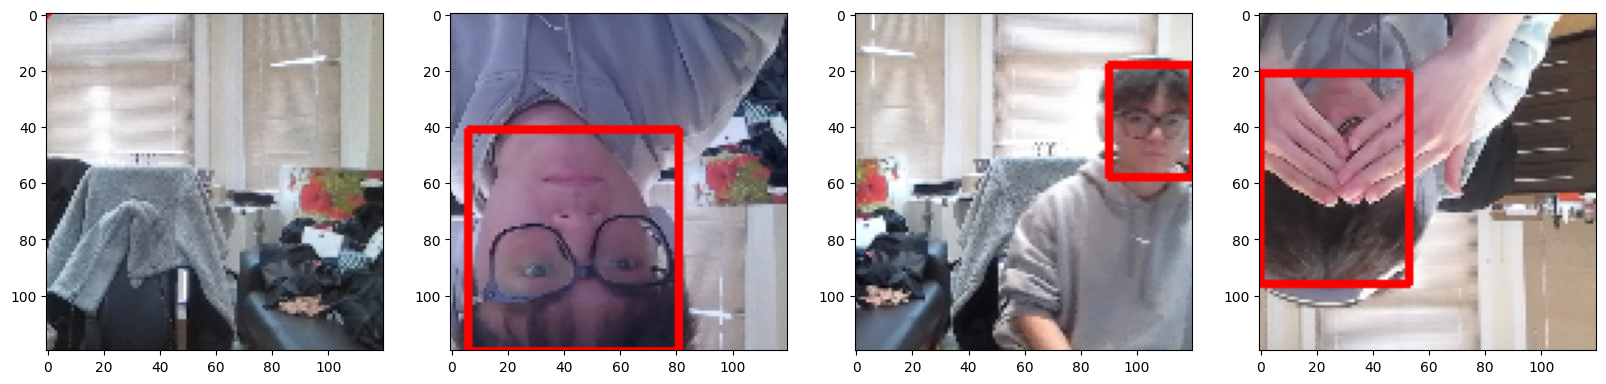

In [550]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    sample_image = np.copy(res[0][idx])#make a copy to ensure the data can be write 
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [552]:
# Build Deep Learning using the Functional API

In [554]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [556]:
vgg = VGG16(include_top=False)

In [558]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [560]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [640]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0]], dtype=uint8),
 array([[0.1383 , 0.0606 , 0.4927 , 0.6523 ],
        [0.1871 , 0.08026, 0.545  , 0.618  ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.1454 , 0.336  , 0.772  , 1.     ],
        [0.4333 , 0.1458 , 0.6895 , 0.457  ],
        [0.3447 , 0.4028 , 0.723  , 0.9126 ],
        [0.379  , 0.52   , 0.6294 , 0.853  ],
        [0.     , 0.     , 0.     , 0.     ]], dtype=float16))

In [562]:
#Test

In [564]:
facetracker = build_model()

In [565]:
facetracker.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_7[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_4 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                              

In [642]:
X, y = train.as_numpy_iterator().next()

In [644]:
X.shape

(8, 120, 120, 3)

In [646]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 0s 23ms/step


In [574]:
classes, coords

(array([[0.49165004],
        [0.49281383],
        [0.42697397],
        [0.53933316],
        [0.4719134 ],
        [0.3902975 ],
        [0.5368036 ],
        [0.4435876 ]], dtype=float32),
 array([[0.60430753, 0.6655902 , 0.5053657 , 0.63707185],
        [0.6920531 , 0.57503575, 0.6034684 , 0.6768629 ],
        [0.63927513, 0.5573463 , 0.4006468 , 0.653847  ],
        [0.5639874 , 0.5644661 , 0.42655343, 0.58653295],
        [0.65483695, 0.5883733 , 0.3433332 , 0.6688984 ],
        [0.6347089 , 0.57617617, 0.43403786, 0.71009123],
        [0.6628259 , 0.5655956 , 0.56397706, 0.6721847 ],
        [0.6682335 , 0.59032154, 0.45132208, 0.6506597 ]], dtype=float32))

In [576]:
#Define Losses and Optimizers

In [648]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [650]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [652]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [654]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [656]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0027244429>

In [658]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=5.048723e-05>

In [660]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0027244429>

In [592]:
#Train Neural Network

In [662]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [664]:
model = FaceTracker(facetracker)

In [666]:
model.compile(opt, classloss, regressloss)

In [668]:
logdir='logs'

In [670]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [672]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
473/473 [==============================] - 21s 34ms/step - total_loss: 0.0678 - class_loss: 0.0206 - regress_loss: 0.0575 - val_total_loss: 0.0209 - val_class_loss: 1.9878e-05 - val_regress_loss: 0.0209
Epoch 2/20
473/473 [==============================] - 19s 34ms/step - total_loss: 0.0462 - class_loss: 0.0125 - regress_loss: 0.0399 - val_total_loss: 0.0081 - val_class_loss: 1.3235e-04 - val_regress_loss: 0.0081
Epoch 3/20
473/473 [==============================] - 20s 35ms/step - total_loss: 0.0143 - class_loss: 0.0048 - regress_loss: 0.0119 - val_total_loss: 0.1997 - val_class_loss: 0.0064 - val_regress_loss: 0.1965
Epoch 4/20
473/473 [==============================] - 20s 35ms/step - total_loss: 0.0047 - class_loss: 3.0763e-04 - regress_loss: 0.0045 - val_total_loss: 0.0035 - val_class_loss: 4.2917e-05 - val_regress_loss: 0.0034
Epoch 5/20
473/473 [==============================] - 20s 36ms/step - total_loss: 0.0032 - class_loss: 6.6080e-05 - regress_loss: 0.0032 - val_t

In [674]:
hist.history

{'total_loss': [0.023669112473726273,
  0.01169164665043354,
  0.003379745641723275,
  0.0007531202863901854,
  0.0012903164606541395,
  0.0012343975249677896,
  0.0006045417976565659,
  0.00172838952858001,
  0.0007918180781416595,
  0.0018000018317252398,
  0.0006157802417874336,
  0.0001960379449883476,
  0.0002856041246559471,
  0.0004959461512044072,
  0.0005130689241923392,
  0.0008353813318535686,
  0.0010897336760535836,
  0.00037770072231069207,
  0.0003064032061956823,
  0.00031319342087954283],
 'class_loss': [0.020661884918808937,
  7.614998321514577e-05,
  1.695809442026075e-05,
  5.6895129091572016e-05,
  3.862529410980642e-05,
  2.902830601669848e-05,
  1.5423071090481244e-05,
  9.194181075145025e-06,
  2.622687134135049e-05,
  1.9744607925531454e-05,
  6.675753866147716e-06,
  2.2516160242957994e-05,
  1.2666118891502265e-05,
  1.5497255390073406e-06,
  6.407528417184949e-06,
  4.7386142796312924e-06,
  7.152562488954572e-07,
  6.258495659494656e-07,
  1.594426066731102

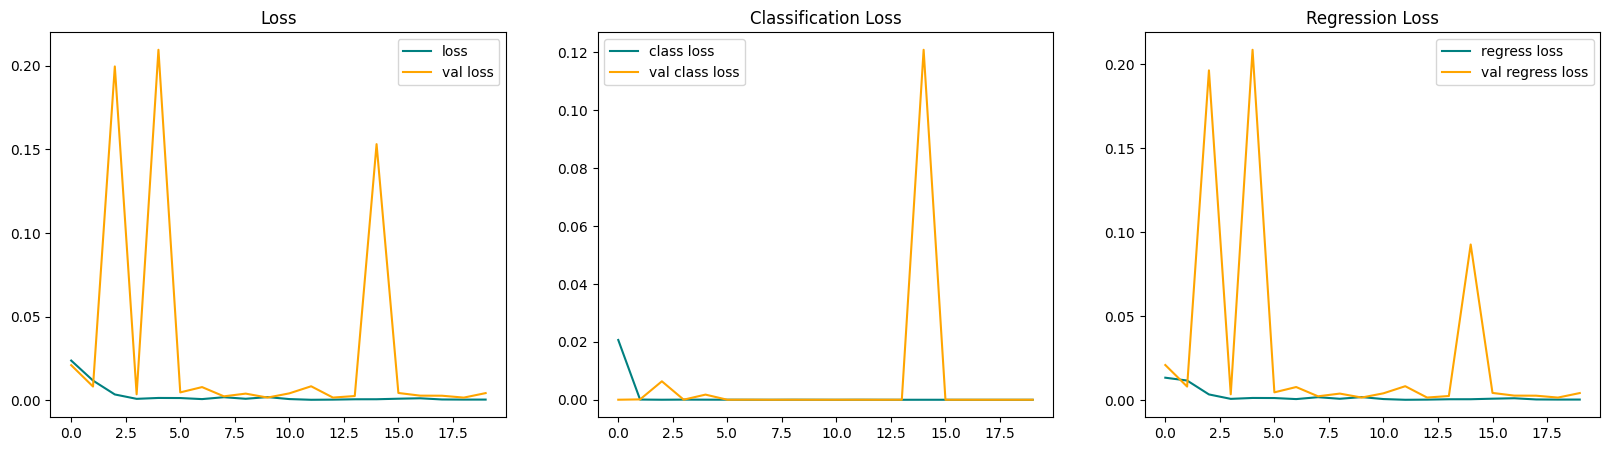

In [676]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [440]:
# Make Predictions

In [701]:
test_data = test.as_numpy_iterator()

In [703]:
test_sample = test_data.next()

In [704]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 16ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


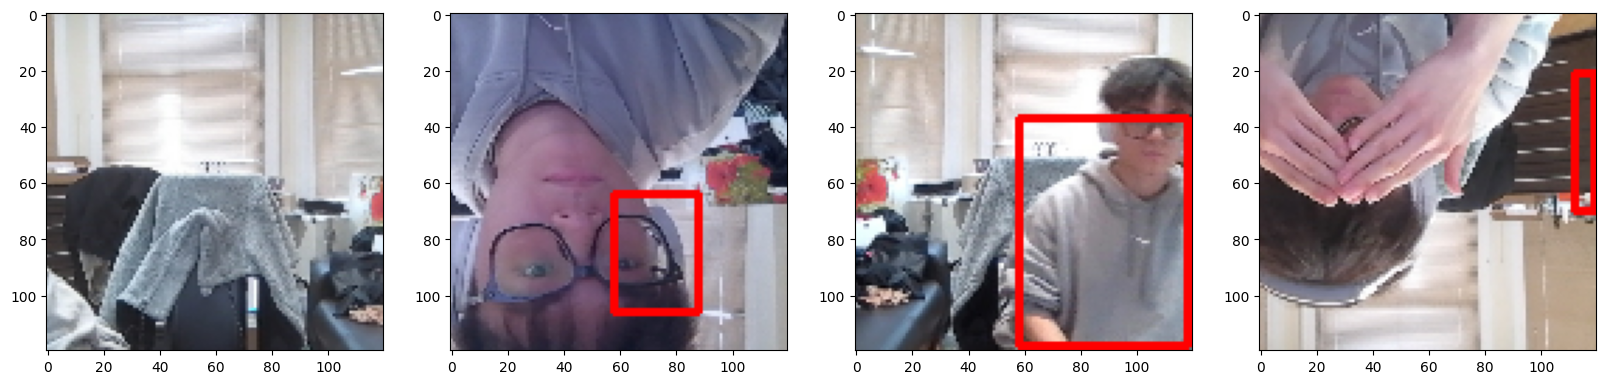

In [705]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        sample_image = np.copy(res[0][idx])
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [ ]:
#Save the Model

In [709]:
from tensorflow.keras.models import load_model

In [711]:
facetracker.save('facetracker.h5')

In [713]:
facetracker = load_model('facetracker.h5')

In [ ]:
#Real Time Detection

In [717]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 14ms/step


KeyboardInterrupt: 